<a href="https://colab.research.google.com/github/prkhr7/prakhar-rawat/blob/master/OSAMAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 !pip install wtfml
!pip install pretrainedmodels

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('drive/My Drive/melanoma/HAM10000_metadata.csv')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image
np.random.seed(123)
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np
import pandas as pd
import os

from tensorflow.keras.utils import to_categorical
from glob import glob

In [ ]:
df['age'].fillna(int(df['age'].mean()),inplace=True)

In [ ]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
base_skin_dir = 'drive/My Drive/melanoma'
imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}


In [ ]:
df.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [ ]:
df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get) 
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes
df

lesion_id      image_id  ...                       cell_type cell_type_idx
0      HAM_0000118  ISIC_0027419  ...  Benign keratosis-like lesions              2
1      HAM_0000118  ISIC_0025030  ...  Benign keratosis-like lesions              2
2      HAM_0002730  ISIC_0026769  ...  Benign keratosis-like lesions              2
3      HAM_0002730  ISIC_0025661  ...  Benign keratosis-like lesions              2
4      HAM_0001466  ISIC_0031633  ...  Benign keratosis-like lesions              2
...            ...           ...  ...                             ...           ...
10010  HAM_0002867  ISIC_0033084  ...               Actinic keratoses             0
10011  HAM_0002867  ISIC_0033550  ...               Actinic keratoses             0
10012  HAM_0002867  ISIC_0033536  ...               Actinic keratoses             0
10013  HAM_0000239  ISIC_0032854  ...               Actinic keratoses             0
10014  HAM_0003521  ISIC_0032258  ...                        Melanoma             5

[10015 rows x 10 columns]

In [ ]:
!ls 'drive/My Drive/melanoma/1'

ISIC_0024306.jpg  ISIC_0025556.jpg  ISIC_0026806.jpg  ISIC_0028056.jpg
ISIC_0024307.jpg  ISIC_0025557.jpg  ISIC_0026807.jpg  ISIC_0028057.jpg
ISIC_0024308.jpg  ISIC_0025558.jpg  ISIC_0026808.jpg  ISIC_0028058.jpg
ISIC_0024309.jpg  ISIC_0025559.jpg  ISIC_0026809.jpg  ISIC_0028059.jpg
ISIC_0024310.jpg  ISIC_0025560.jpg  ISIC_0026810.jpg  ISIC_0028060.jpg
ISIC_0024311.jpg  ISIC_0025561.jpg  ISIC_0026811.jpg  ISIC_0028061.jpg
ISIC_0024312.jpg  ISIC_0025562.jpg  ISIC_0026812.jpg  ISIC_0028062.jpg
ISIC_0024313.jpg  ISIC_0025563.jpg  ISIC_0026813.jpg  ISIC_0028063.jpg
ISIC_0024314.jpg  ISIC_0025564.jpg  ISIC_0026814.jpg  ISIC_0028064.jpg
ISIC_0024315.jpg  ISIC_0025565.jpg  ISIC_0026815.jpg  ISIC_0028065.jpg
ISIC_0024316.jpg  ISIC_0025566.jpg  ISIC_0026816.jpg  ISIC_0028066.jpg
ISIC_0024317.jpg  ISIC_0025567.jpg  ISIC_0026817.jpg  ISIC_0028067.jpg
ISIC_0024318.jpg  ISIC_0025568.jpg  ISIC_0026818.jpg  ISIC_0028068.jpg
ISIC_0024319.jpg  ISIC_0025569.jpg  ISIC_0026819.jpg  ISIC_0028069.jpg
ISIC_0

In [ ]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((125,100))))

KeyboardInterrupt: ignored

In [ ]:
df['image'].map(lambda x: x.shape).value_counts()

In [ ]:
df= df[df['age'] != 0]
df= df[df['sex'] != 'unknown']

In [ ]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.125, bottom=1, right=0.9, top=2, hspace=0.2)
plt.subplot(2,4,1)
plt.title("AGE",fontsize=15)
plt.ylabel("Count")
df['age'].value_counts().plot.bar()

plt.subplot(2,4,2)
plt.title("GENDER",fontsize=15)
plt.ylabel("Count")
df['sex'].value_counts().plot.bar()

plt.subplot(2,4,3)
plt.title("localization",fontsize=15)
plt.ylabel("Count")
plt.xticks(rotation=45)
df['localization'].value_counts().plot.bar()

plt.subplot(2,4,4)
plt.title("CELL TYPE",fontsize=15)
plt.ylabel("Count")
df['cell_type'].value_counts().plot.bar()



In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
df['dx'].value_counts().plot.pie(autopct="%1.1f%%")
plt.subplot(1,2,2)
df['dx_type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

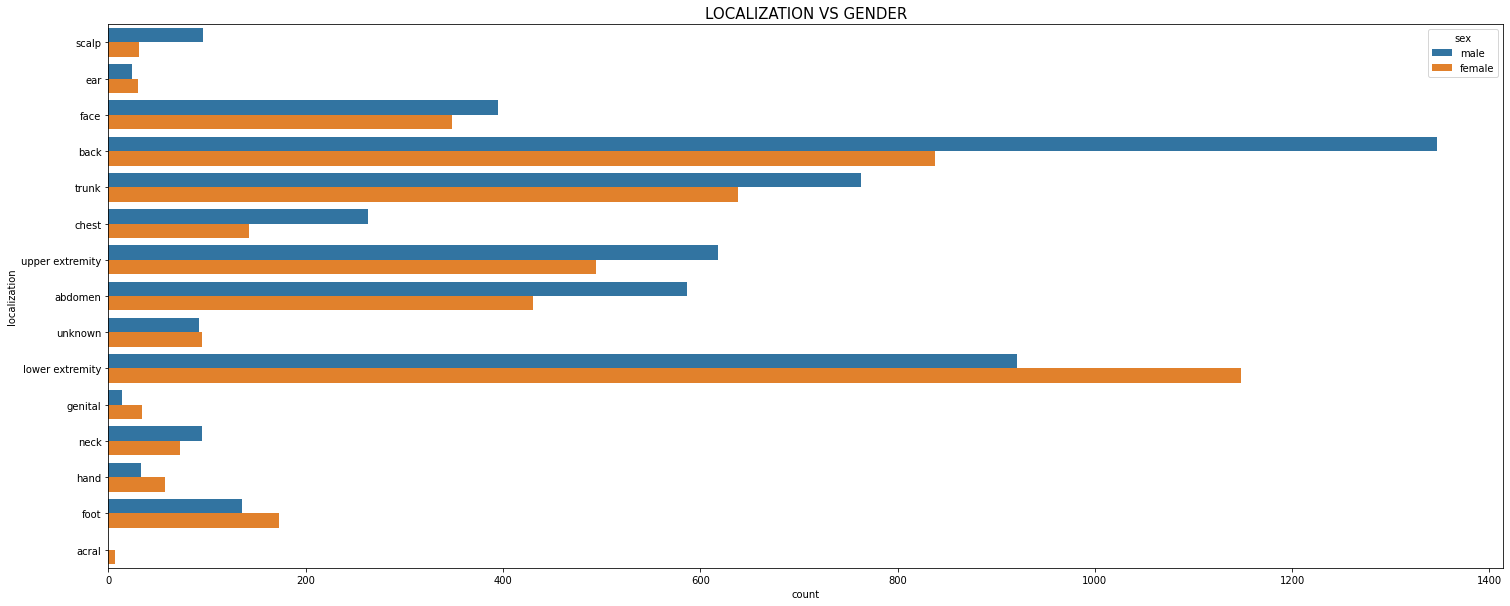

In [ ]:
plt.figure(figsize=(25,10))
plt.title('LOCALIZATION VS GENDER',fontsize = 15)
sns.countplot(y='localization', hue='sex',data=df)

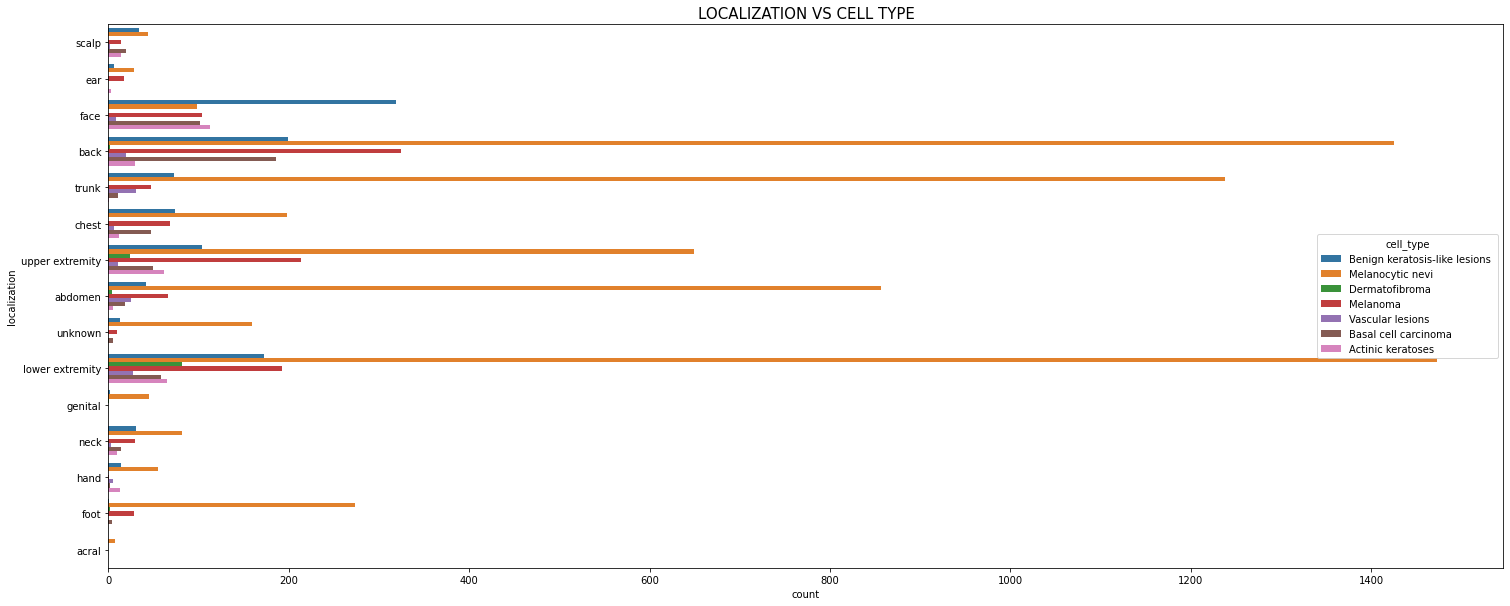

In [ ]:
plt.figure(figsize=(25,10))
plt.title('LOCALIZATION VS CELL TYPE',fontsize = 15)
sns.countplot(y='localization', hue='cell_type',data=df)

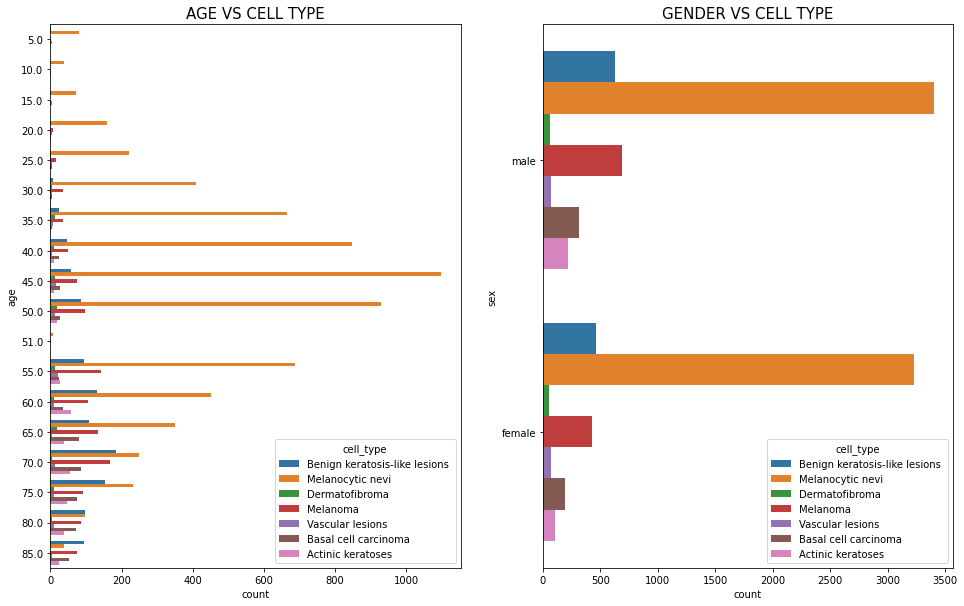

In [ ]:
plt.figure(figsize=(25,10))
plt.subplot(131)
plt.title('AGE VS CELL TYPE',fontsize = 15)
sns.countplot(y='age', hue='cell_type',data=df)
plt.subplot(132)
plt.title('GENDER VS CELL TYPE',fontsize = 15)
sns.countplot(y='sex', hue='cell_type',data=df)

In [ ]:
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [ ]:
features=df.drop(columns=['cell_type_idx'],axis=1)
target=df['cell_type_idx']

In [ ]:
features.head()

lesion_id  ...                                              image
0  HAM_0000118  ...  [[[189, 152, 194], [192, 156, 198], [191, 154,...
1  HAM_0000118  ...  [[[24, 13, 22], [24, 14, 22], [24, 14, 26], [2...
2  HAM_0002730  ...  [[[186, 127, 135], [189, 133, 145], [192, 135,...
3  HAM_0002730  ...  [[[24, 11, 17], [24, 11, 20], [30, 15, 25], [4...
4  HAM_0001466  ...  [[[131, 88, 110], [142, 97, 120], [152, 107, 1...

[5 rows x 10 columns]

In [ ]:
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.25,random_state=666)
tf.unique(x_train_o.cell_type.values)

Unique(y=<tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'Melanocytic nevi', b'Basal cell carcinoma', b'Melanoma',
       b'Actinic keratoses', b'Vascular lesions',
       b'Benign keratosis-like lesions ', b'Dermatofibroma'], dtype=object)>, idx=<tf.Tensor: shape=(7440,), dtype=int32, numpy=array([0, 1, 2, ..., 1, 0, 0], dtype=int32)>)

In [ ]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [ ]:
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 999)
x_train = x_train.reshape(x_train.shape[0], *(100, 125, 3))
x_test = x_test.reshape(x_test.shape[0], *(100, 125, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(100, 125, 3))

In [ ]:
x_train = x_train.reshape(6696,125*100*3)
x_test = x_test.reshape(2481,125*100*3)
print(x_train.shape)
print(x_test.shape)

(6696, 37500)
(2481, 37500)


In [ ]:
model = Sequential()

model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu', input_dim = 37500))
model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units= 64, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 7, kernel_initializer = 'uniform', activation = 'softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00075,
                                    beta_1 = 0.9,
                                    beta_2 = 0.999,
                                    epsilon = 1e-8)

In [ ]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(x_train, y_train, batch_size = 10, epochs = 10)
accuracy = model.evaluate(x_test, y_test, verbose=1)[1]
print("Test: accuracy = ",accuracy*100,"%")

Epoch 1/10
670/670 [==============================] - 13s 18ms/step - loss: 0.9987 - accuracy: 0.6673
Epoch 2/10
670/670 [==============================] - 12s 18ms/step - loss: 0.9092 - accuracy: 0.6846
Epoch 3/10
670/670 [==============================] - 12s 18ms/step - loss: 0.8634 - accuracy: 0.6940
Epoch 4/10
670/670 [==============================] - 12s 18ms/step - loss: 0.8303 - accuracy: 0.7049
Epoch 5/10
670/670 [==============================] - 12s 18ms/step - loss: 0.7962 - accuracy: 0.7154
Epoch 6/10
670/670 [==============================] - 12s 18ms/step - loss: 0.7679 - accuracy: 0.7264
Epoch 7/10
670/670 [==============================] - 12s 18ms/step - loss: 0.7269 - accuracy: 0.7351
Epoch 8/10
670/670 [==============================] - 13s 19ms/step - loss: 0.7031 - accuracy: 0.7473
Epoch 9/10
670/670 [==============================] - 13s 20ms/step - loss: 0.6825 - accuracy: 0.7552
Epoch 10/10
78/78 [==============================] - 1s 8ms/step - loss: 0.8090 - 

**2nd** **TIME**

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
from sklearn.metrics import confusion_matrix , classification_report
from PIL import Image

In [2]:
df1=pd.read_csv('drive/My Drive/melanoma/hmnist_28_28_RGB.csv')
df1.head()

pixel0000  pixel0001  pixel0002  ...  pixel2350  pixel2351  label
0        192        153        193  ...        154        177      2
1         25         14         30  ...         14         27      2
2        192        138        153  ...        104        117      2
3         38         19         30  ...         12         15      2
4        158        113        139  ...         78         92      2

[5 rows x 2353 columns]

In [3]:
other=pd.read_csv('drive/My Drive/melanoma/HAM10000_metadata.csv')
other.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [4]:
classes = {4: ('nv', ' melanocytic nevi'), 
           6: ('mel', 'melanoma'), 
           2 :('bkl', 'benign keratosis-like lesions'), 
           1:('bcc' , ' basal cell carcinoma'), 
           5: ('vasc', ' pyogenic granulomas and hemorrhage'), 
           0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  
           3: ('df', 'dermatofibroma')}

In [5]:
data1=df1

In [6]:
#I realize the last column being the label
y = data1['label']
x = data1.drop(columns = ['label'])
#get x_train ,y_train
x.shape

(10015, 2352)

Text(0.5, 1.0, 'Frequency Distribution of Classes')

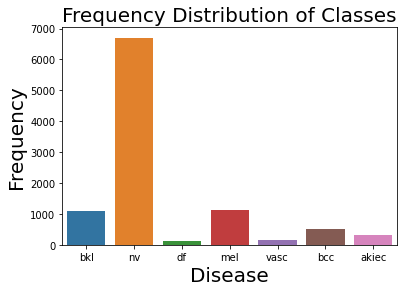

In [7]:
sns.countplot(x = 'dx', data = other)
plt.xlabel('Disease', size=20)
plt.ylabel('Frequency', size=20)
plt.title('Frequency Distribution of Classes', size=20)

In [8]:
k = y.map(classes.get) 
k.value_counts() < 1000, k.value_counts() > 5000,k.value_counts()

((nv,  melanocytic nevi)                                      False
 (mel, melanoma)                                              False
 (bkl, benign keratosis-like lesions)                         False
 (bcc,  basal cell carcinoma)                                  True
 (akiec, Actinic keratoses and intraepithelial carcinomae)     True
 (vasc,  pyogenic granulomas and hemorrhage)                   True
 (df, dermatofibroma)                                          True
 Name: label, dtype: bool,
 (nv,  melanocytic nevi)                                       True
 (mel, melanoma)                                              False
 (bkl, benign keratosis-like lesions)                         False
 (bcc,  basal cell carcinoma)                                 False
 (akiec, Actinic keratoses and intraepithelial carcinomae)    False
 (vasc,  pyogenic granulomas and hemorrhage)                  False
 (df, dermatofibroma)                                         False
 Name: label, dtype: 

Text(0.5, 1.0, 'Gender of Patient')

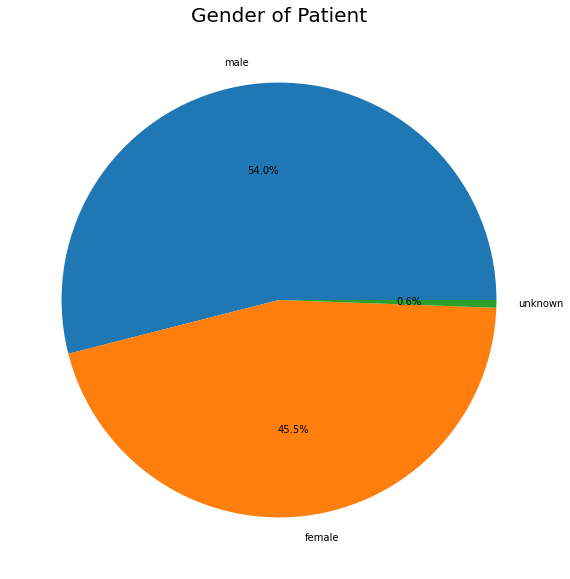

In [9]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(other['sex'].value_counts(), 
        labels = other['sex'].value_counts().index, 
        autopct="%.1f%%")
plt.title('Gender of Patient', size=20)

Text(0.5, 1.0, 'Histogram of Age of Patients')

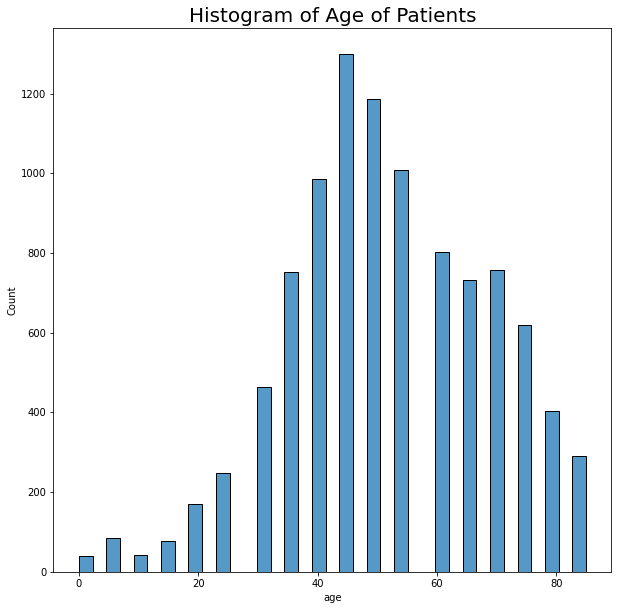

In [10]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(other['age'])
plt.title('Histogram of Age of Patients', size=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

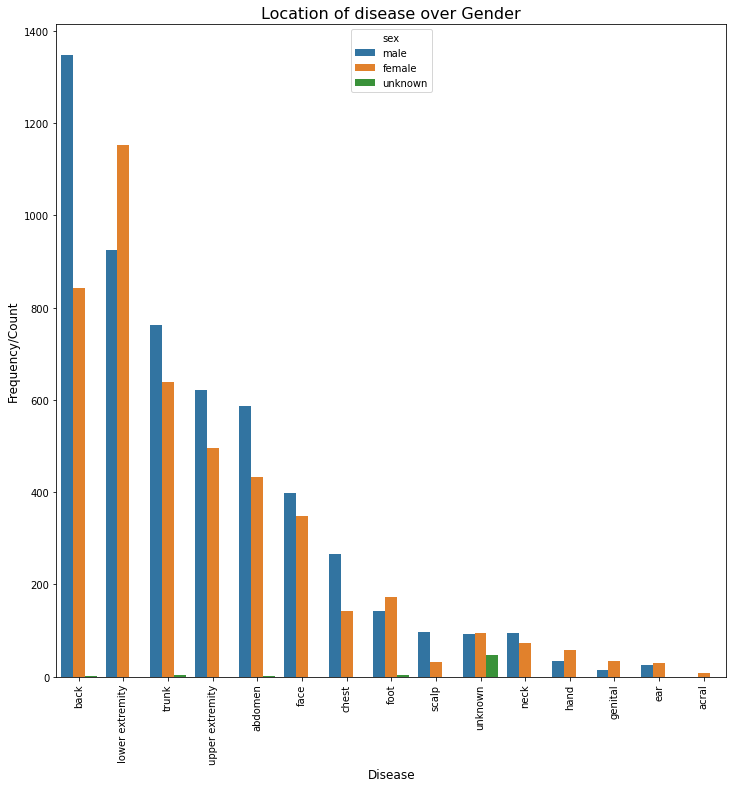

In [11]:
value = other[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)

In [12]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)
x = np.array(x).reshape(-1,28,28,3)
print('Shape of Data :',x.shape)

Shape of Data : (46935, 28, 28, 3)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


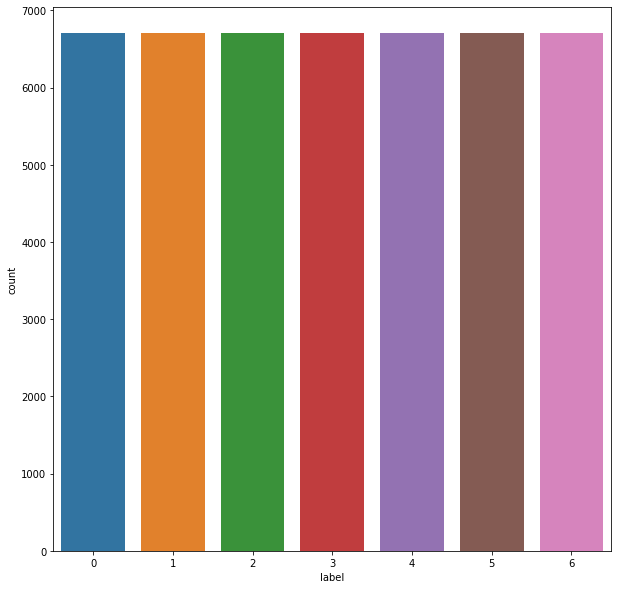

In [13]:
plt.figure(figsize = (10,10))
sns.countplot(y)

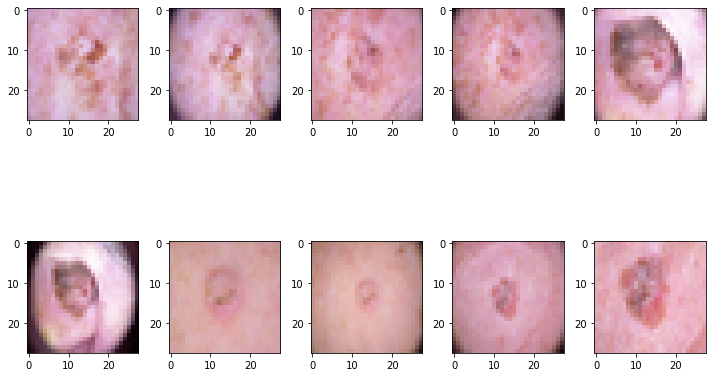

In [14]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0 
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x[k].reshape(28,28,3))
        k = k + 1
    plt.tight_layout()

In [15]:
x = (x-np.mean(x))/np.std(x)

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=42)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
(28, 28, 3)


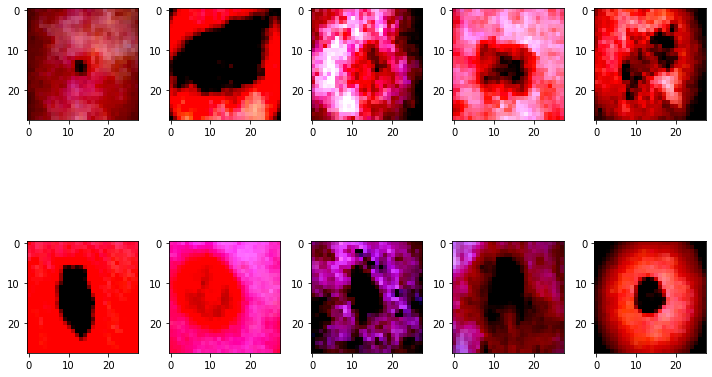

In [ ]:
f , ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0 
for i in range(2):
    for j in range(5):
        print(X_train[k].shape)
        
        ax[i,j].imshow(X_train[k].reshape(28,28,3))
        k = k + 1
    plt.tight_layout()

In [17]:
model = Sequential()
model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(7, activation='softmax'))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [19]:
Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',
                                                  monitor='val_loss', mode='max',
                                                 verbose=0)
File = 'SkinDiseases'
callback = [Checkpoint, 
             tf.keras.callbacks.EarlyStopping(patience = 5, monitor= "val_acc",verbose=1),
             tf.keras.callbacks.TensorBoard(log_dir = "logs/{}".format(File))]

In [21]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.2,
                    batch_size = 128,
                    epochs = 50,
                    callbacks=[callback])

Epoch 1/50
235/235 [==============================] - 5s 19ms/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.2172 - val_accuracy: 0.9557
Epoch 2/50
235/235 [==============================] - 4s 15ms/step - loss: 0.0220 - accuracy: 0.9935 - val_loss: 0.1690 - val_accuracy: 0.9695
Epoch 3/50
235/235 [==============================] - 4s 17ms/step - loss: 0.0253 - accuracy: 0.9918 - val_loss: 0.1992 - val_accuracy: 0.9663
Epoch 4/50
235/235 [==============================] - 4s 18ms/step - loss: 0.0075 - accuracy: 0.9975 - val_loss: 0.1410 - val_accuracy: 0.9759
Epoch 5/50
235/235 [==============================] - 5s 23ms/step - loss: 0.0444 - accuracy: 0.9855 - val_loss: 0.1671 - val_accuracy: 0.9711
Epoch 6/50
235/235 [==============================] - 6s 24ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.1800 - val_accuracy: 0.9698
Epoch 7/50
235/235 [==============================] - 6s 26ms/step - loss: 0.0403 - accuracy: 0.9872 - val_loss: 0.1441 - val_accuracy: 0.9714

In [ ]:
accuracy = model.evaluate(X_test, Y_test, verbose=1)[1]
print("Test: accuracy = ",accuracy*100,"%")

294/294 [==============================] - 1s 5ms/step - loss: 0.2087 - accuracy: 0.9775
Test: accuracy =  97.75221347808838 %


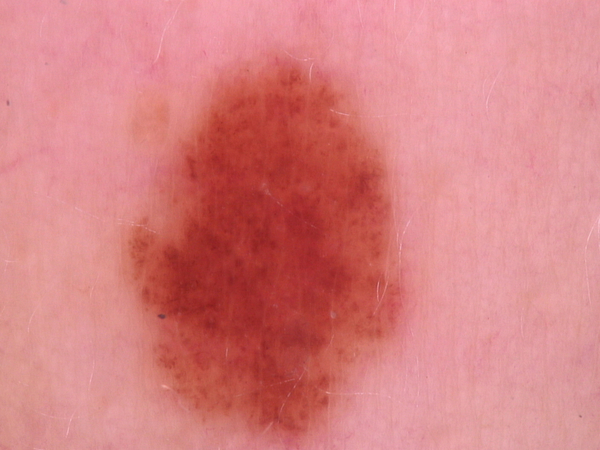

810000
(450, 600, 3)
('nv', ' melanocytic nevi')


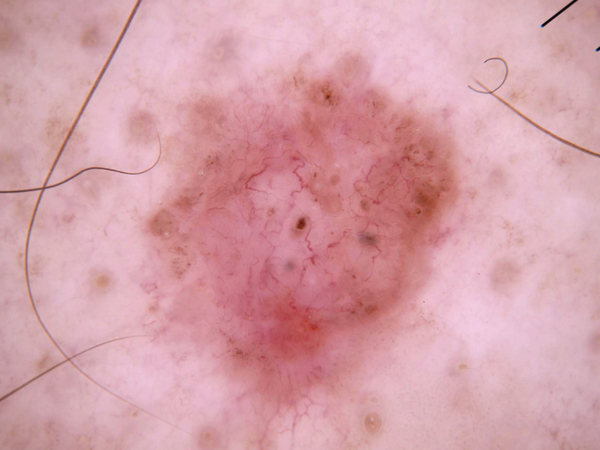

810000
(450, 600, 3)
('nv', ' melanocytic nevi')


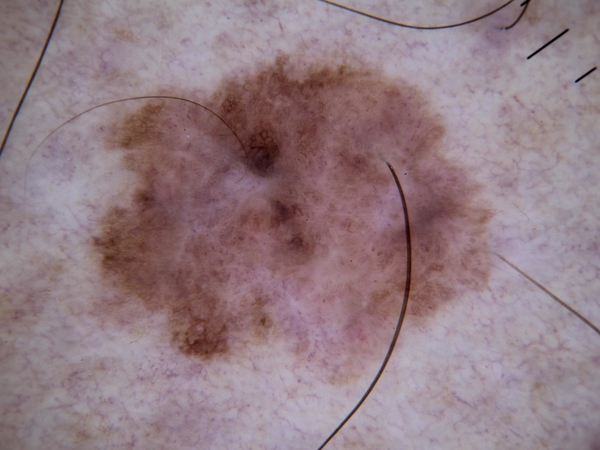

810000
(450, 600, 3)
('nv', ' melanocytic nevi')


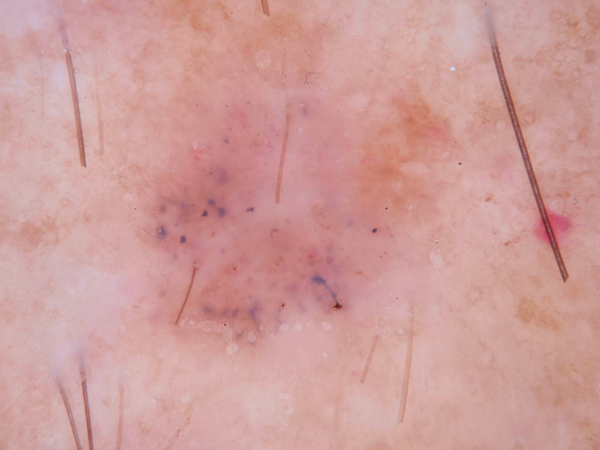

810000
(450, 600, 3)
('nv', ' melanocytic nevi')


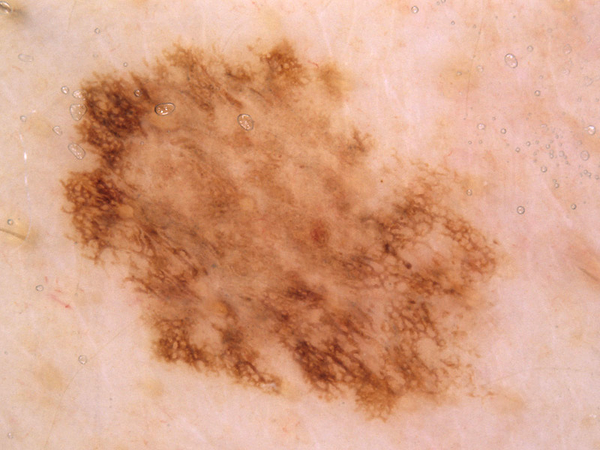

810000
(450, 600, 3)
('nv', ' melanocytic nevi')


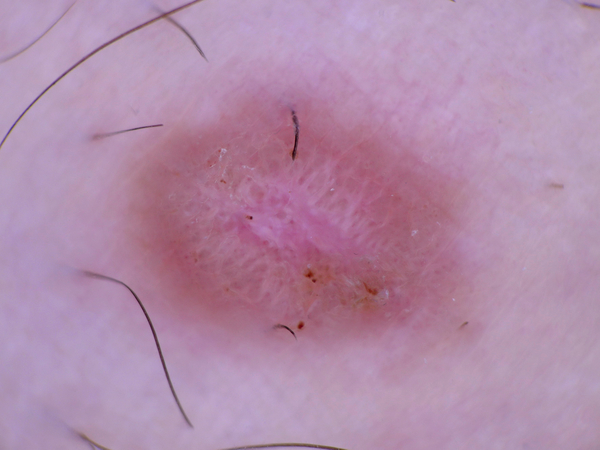

810000
(450, 600, 3)
('nv', ' melanocytic nevi')


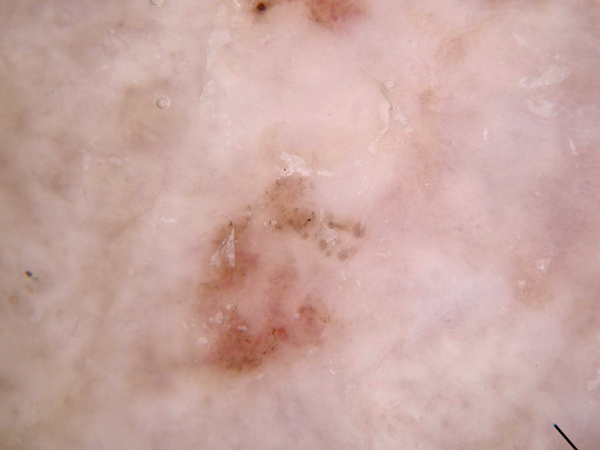

810000
(450, 600, 3)
('nv', ' melanocytic nevi')


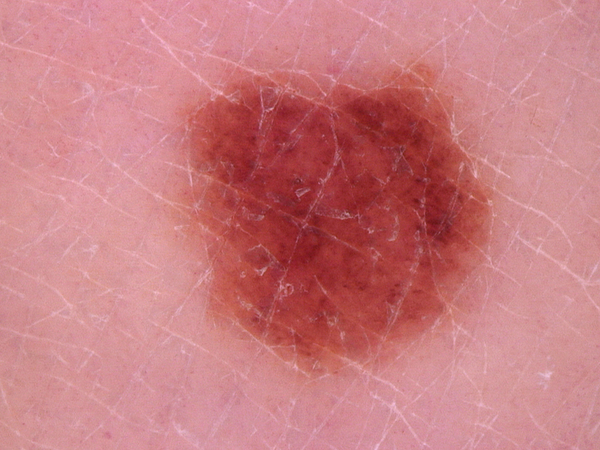

810000
(450, 600, 3)
('nv', ' melanocytic nevi')


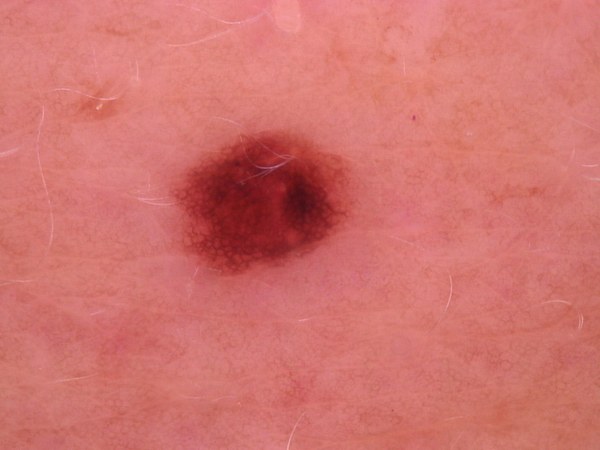

810000
(450, 600, 3)
('nv', ' melanocytic nevi')


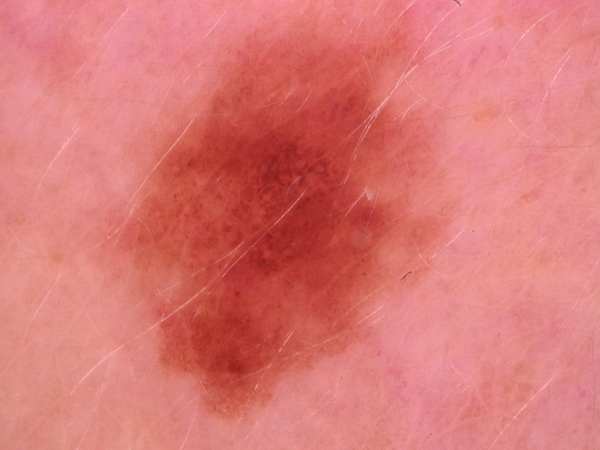

810000
(450, 600, 3)
('nv', ' melanocytic nevi')


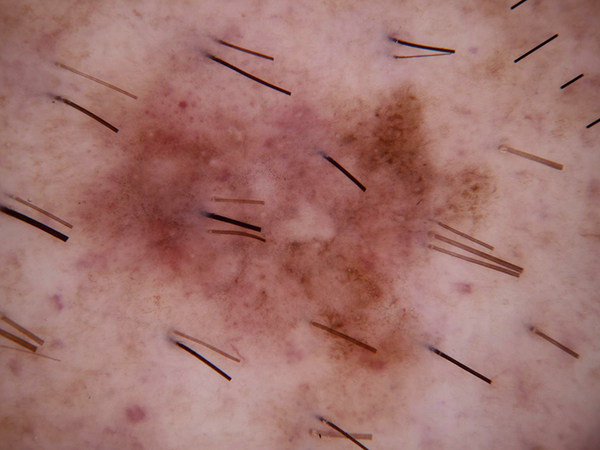

810000
(450, 600, 3)
('nv', ' melanocytic nevi')


In [29]:
!pip install google.colab
from google.colab.patches import cv2_imshow
import os
import cv2
srcdir = 'drive/My Drive/melanoma/check'
count=0
for temp in os.listdir(srcdir):
    img = cv2.imread(os.path.join(srcdir, temp))
    cv2.imwrite(temp, img)
    cv2_imshow(img)
    print(img.size)
    print(img.shape)
    img = cv2.resize(img, (28, 28),interpolation = cv2.INTER_AREA)
    result = model.predict(img.reshape(1, 28, 28, 3))
    #img = cv2.resize(img, (28, 28), interpolation = cv2.INTER_AREA)
    #print(img.size)
    #print(img.shape)
    #img_copy = img.copy()
    #img_copy = np.reshape(img, (28,28,3))
    #img_copy.reshape(,28*28, 3)

    #result = model.predict(img_copy)
    #img = cv2.resize(img, (313, 220))
    #result= model.predict(img.reshape(313, 220*220))
    max_prob = max(result[0])
    class_ind = list(result[0]).index(max_prob)
    class_name = classes[class_ind]
    print(class_name)
    count+=1
    if count>10:
        break


In [ ]:
!pip install visualkeras
import visualkeras

     |████████████████████████████████| 795 kB 4.2 MB/s 


In [ ]:
visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show
visualkeras.layered_view(model)